In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [15]:
data = pd.read_csv('D:/DataScience/dataSetsAndProgML/DataSets/Credit.csv')
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [17]:
# pandas does not understand object hence we made it categorical as type
data['Gender']=data['Gender'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null category
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 34.9+ KB


In [18]:
data['Student'] = data['Student'].astype('category')
data['Married'] = data['Married'].astype('category')
data['Ethnicity'] = data['Ethnicity'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null category
Student       400 non-null category
Married       400 non-null category
Ethnicity     400 non-null category
Balance       400 non-null int64
dtypes: category(4), float64(1), int64(7)
memory usage: 27.0 KB


In [21]:
data.describe(include=['category'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


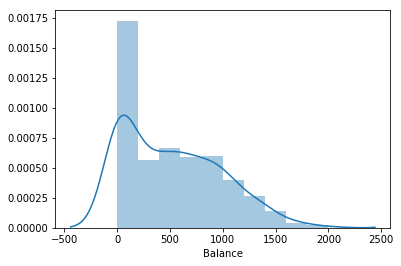

In [26]:
sns.distplot(data['Balance'])

In [33]:
active_users = data[data['Balance']>0]
active_users.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


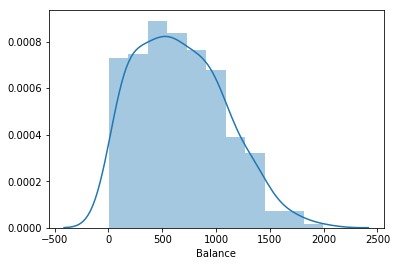

In [35]:
"""
        Below graph shows that Rating and limit both are highly correlated with the income,
        hence we have to drop either one of them.

"""

sns.distplot(active_users['Balance'])

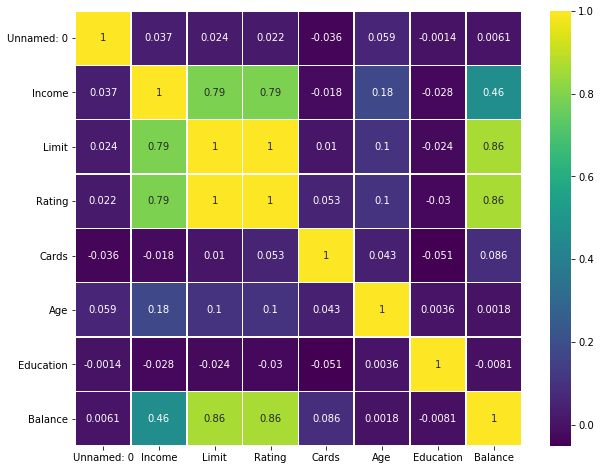

In [55]:

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=0.5,ax=ax)


In [68]:
# This is our Base Model

mod0 = smf.ols('Balance~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity',
              data=data).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          4.46e-248
Time:                        11:26:23   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
mod1 = smf.ols('Balance~ Income + Limit + Cards + Age + Education + Gender + Student + Married + Ethnicity',
              data=active_users).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.726e+04
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:32:40   Log-Likelihood:                -1165.6
No. Observations:                 310   AIC:                             2353.
Df Residuals:                     299   BIC:                             2394.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -700.2736      4.223   -165.834      0.000    -708.584    -691.964
Gender[T.Female]           0.1597      1.210      0.132      0.895      -2.221       2.541
Student[T.Yes]           500.2986      1.882    265.843      0.000     496.595     504.002
Married[T.Yes]            -2.3998      1.263     -1.900      0.058      -4.886       0.086
Ethnicity[T.Asian]        -1.2354      1.744     -0.708      0.479      -4.667       2.196
Ethnicity[T.Caucasian]    -0.1276      1.478     -0.086      0.931      -3.037       2.782
Income                    -9.9916      0.030   -336.712      0.000     -10.050      -9.933
Limit                      0.3264      0.001    600.016      0.000       0.325       0.328
Cards                     24.8222      0.425     58.472      0.000      23.987      25.658
Age                       -1.0064      0.036    -28.107      0.000      -1.077      -0.936
Education                  0.0289      0.190      0.152      0.879      -0.346       0.404
==============================================================================
Omnibus:                        5.212   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.335
Skew:                          -0.311   Prob(JB):                       0.0694
Kurtosis:                       2.840   Cond. No.                     4.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
mod3 = smf.ols('Balance~ Income + Rating + Age  + Student ',
              data=active_users).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4742.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.86e-273
Time:                        12:33:44   Log-Likelihood:                -1664.7
No. Observations:                 310   AIC:                             3339.
Df Residuals:                     305   BIC:                             3358.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -778.2416     14.813    -52.539      0.000    -807.390    -749.093
Student[T.Yes]   481.6563      9.150     52.638      0.000     463.651     499.662
Income            -9.7514      0.145    -67.296      0.000     -10.037      -9.466
Rating             4.7845      0.040    120.874      0.000       4.707       4.862
Age               -1.1141      0.177     -6.303      0.000      -1.462      -0.766
==============================================================================
Omnibus:                        2.951   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.746
Skew:                          -0.162   Prob(JB):                        0.253
Kurtosis:                       2.671   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Student
No     AxesSubplot(0.555556,0.125;0.344444x0.18875)
Yes    AxesSubplot(0.555556,0.125;0.344444x0.18875)
Name: Age, dtype: object

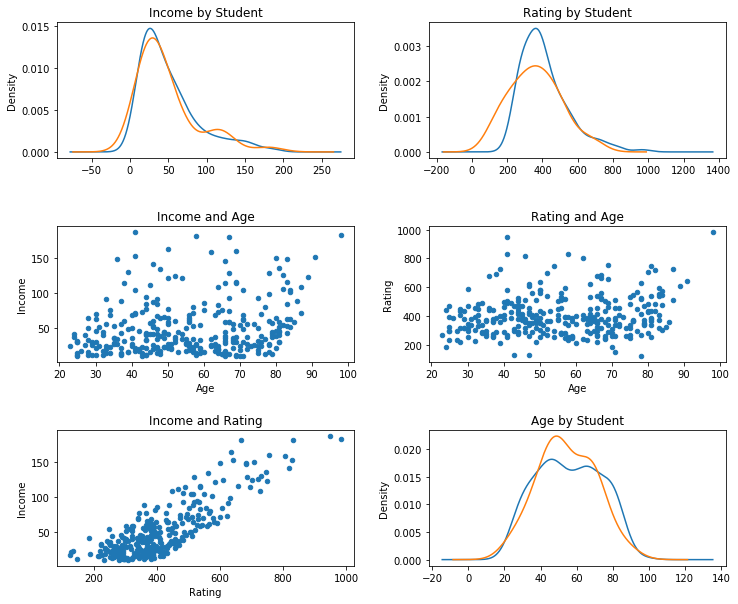

In [86]:
f, axes = plt.subplots(3,2,figsize=(12,10))
f.subplots_adjust(hspace=0.5,wspace=0.25)

active_users.groupby('Student').Income.plot(kind='kde',ax=axes[0][0],title='Income by Student')

active_users.groupby('Student').Rating.plot(kind='kde',ax=axes[0][1],title='Rating by Student')

active_users.plot(kind='scatter',x='Age',y='Income',ax=axes[1][0],title='Income and Age')

active_users.plot(kind='scatter',x='Age',y='Rating',ax=axes[1][1],title='Rating and Age')

active_users.plot(kind='scatter',x='Rating',y='Income',ax=axes[2][0],title='Income and Rating')

active_users.groupby('Student').Age.plot(kind='kde',ax=axes[2][1],title='Age by Student')

In [77]:
# This show income as -ve which means it has non linear relationship with target.
mod1 = smf.ols('Balance~ Income + Rating + Student',
              data=active_users).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5600.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          6.11e-267
Time:                        12:34:22   Log-Likelihood:                -1683.7
No. Observations:                 310   AIC:                             3375.
Df Residuals:                     306   BIC:                             3390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -837.4058     12.163    -68.849      0.000    -861.339    -813.472
Student[T.Yes]   483.2551      9.708     49.777      0.000     464.151     502.359
Income            -9.9002      0.152    -65.242      0.000     -10.199      -9.602
Rating             4.7954      0.042    114.254      0.000       4.713       4.878
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.288
Skew:                          -0.158   Prob(JB):                        0.319
Kurtosis:                       2.723   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# This means Income is related with rating or with 
model2 = smf.ols('Balance~ Income + I(Income**2) + Rating + Student',
              data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1889.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          6.19e-256
Time:                        12:19:55   Log-Likelihood:                -2419.0
No. Observations:                 400   AIC:                             4848.
Df Residuals:                     395   BIC:                             4868.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -560.6801     17.667    -31.735      0.000    -595.414    -525.946
Student[T.Yes]   418.2000     17.181     24.341      0.000     384.423     451.977
Income            -8.7165      0.515    -16.938      0.000      -9.728      -7.705
I(Income ** 2)     0.0056      0.003      1.848      0.065      -0.000       0.012
Rating             3.9856      0.055     73.063      0.000       3.878       4.093
==============================================================================
Omnibus:                       12.259   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.532
Skew:                           0.408   Prob(JB):                      0.00190
Kurtosis:                       2.708   Cond. No.                     2.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

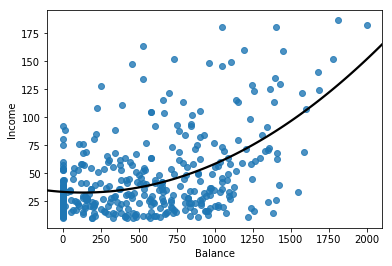

In [74]:
sns.regplot('Balance','Income',data=data,ci=None,order=2,line_kws={'color':'black'})

In [89]:
model = smf.ols('Balance~ Income +  Rating + Age + Student + Education*Income',
              data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.11e-253
Time:                        13:08:15   Log-Likelihood:                -2416.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     393   BIC:                             4875.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -482.0366     42.642    -11.304      0.000    -565.871    -398.202
Student[T.Yes]     417.3773     17.177     24.298      0.000     383.607     451.148
Income              -8.9624      0.642    -13.968      0.000     -10.224      -7.701
Rating               3.9735      0.055     72.814      0.000       3.866       4.081
Age                 -0.6324      0.303     -2.085      0.038      -1.229      -0.036
Education           -4.6911      2.676     -1.753      0.080      -9.952       0.570
Education:Income     0.0884      0.045      1.958      0.051      -0.000       0.177
==============================================================================
Omnibus:                       15.580   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.758
Skew:                           0.493   Prob(JB):                     0.000230
Kurtosis:                       2.822   Cond. No.                     7.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
model = smf.ols('Balance~ Income +  Rating + Age + Student + Married*Age + I(Income**2)',
              data=active_users).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2743.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          4.03e-269
Time:                        13:12:10   Log-Likelihood:                -1661.3
No. Observations:                 310   AIC:                             3339.
Df Residuals:                     302   BIC:                             3369.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -780.4660     19.947    -39.127      0.000    -819.718    -741.214
Student[T.Yes]       480.3464      9.164     52.415      0.000     462.312     498.380
Married[T.Yes]       -10.9152     20.726     -0.527      0.599     -51.701      29.871
Income                -9.3896      0.284    -33.093      0.000      -9.948      -8.831
Rating                 4.7887      0.040    120.352      0.000       4.710       4.867
Age                   -1.1211      0.280     -3.998      0.000      -1.673      -0.569
Married[T.Yes]:Age    -0.0296      0.355     -0.083      0.934      -0.727       0.668
I(Income ** 2)        -0.0024      0.002     -1.432      0.153      -0.006       0.001
==============================================================================
Omnibus:                        2.595   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.512
Skew:                          -0.163   Prob(JB):                        0.285
Kurtosis:                       2.702   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
model = smf.ols('Balance~ Income +  Rating + Limit + Age + Student + Cards',
              data=active_users).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.031e+04
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:47:18   Log-Likelihood:                -1164.6
No. Observations:                 310   AIC:                             2343.
Df Residuals:                     303   BIC:                             2369.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -698.5009      3.294   -212.053      0.000    -704.983    -692.019
Student[T.Yes]   501.0420      1.843    271.823      0.000     497.415     504.669
Income            -9.9930      0.029   -340.893      0.000     -10.051      -9.935
Rating            -0.1501      0.058     -2.574      0.011      -0.265      -0.035
Limit              0.3365      0.004     85.333      0.000       0.329       0.344
Age               -1.0000      0.035    -28.260      0.000      -1.070      -0.930
Cards             25.5015      0.497     51.278      0.000      24.523      26.480
==============================================================================
Omnibus:                        3.568   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.625
Skew:                          -0.258   Prob(JB):                        0.163
Kurtosis:                       2.882   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# Dropping Rating
model = smf.ols('Balance~ Income + Limit + Age + Student + Cards',
              data=active_users).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.462e+04
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:48:17   Log-Likelihood:                -1168.0
No. Observations:                 310   AIC:                             2348.
Df Residuals:                     304   BIC:                             2370.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -701.8012      3.062   -229.184      0.000    -707.827    -695.775
Student[T.Yes]   500.5876      1.852    270.340      0.000     496.944     504.231
Income            -9.9937      0.030   -337.815      0.000     -10.052      -9.935
Limit              0.3264      0.001    601.172      0.000       0.325       0.328
Age               -1.0031      0.036    -28.104      0.000      -1.073      -0.933
Cards             24.8101      0.422     58.739      0.000      23.979      25.641
==============================================================================
Omnibus:                        5.512   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.579
Skew:                          -0.305   Prob(JB):                       0.0615
Kurtosis:                       2.754   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# Dropping Limit
model = smf.ols('Balance~ Income +  Rating + Age + Student + Cards',
              data=active_users).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3804.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.12e-271
Time:                        14:48:49   Log-Likelihood:                -1663.7
No. Observations:                 310   AIC:                             3339.
Df Residuals:                     304   BIC:                             3362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -785.2325     15.651    -50.173      0.000    -816.030    -754.435
Student[T.Yes]   481.7355      9.137     52.721      0.000     463.755     499.716
Income            -9.7292      0.146    -66.818      0.000     -10.016      -9.443
Rating             4.7788      0.040    120.258      0.000       4.701       4.857
Age               -1.1225      0.177     -6.356      0.000      -1.470      -0.775
Cards              2.8731      2.101      1.367      0.173      -1.262       7.008
==============================================================================
Omnibus:                        2.874   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.668
Skew:                          -0.156   Prob(JB):                        0.263
Kurtosis:                       2.670   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
X= data.drop(['Limit'],axis=1)
y = data['Balance']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [ ]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
y_pred = linearRegressor.predict(X_test)
